Project 3

## Clustering

In [26]:
import pandas as pd
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(
    client_id="407ecce27e2941debf00e6aa6d1df04a",
    client_secret="f5699c96ab93485ab9e9732d8dd5bd26"))

data = pd.read_csv("./data/df_all_songs_all.csv")


In [2]:
data = data.drop(columns = ["Unnamed: 0"])

In [3]:
data_only_features = data.copy()

In [4]:
data_only_features = data.drop(columns = ["songs","artists","uri"])

In [5]:
data_only_features

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,0.560,0.166,-16.252,0.0463,0.982000,0.910,0.1840,172.076
1,0.698,0.227,-16.068,0.0529,0.439000,0.563,0.0643,82.942
2,0.645,0.506,-11.213,0.0433,0.590000,0.796,0.3330,84.993
3,0.732,0.307,-11.781,0.2080,0.259000,0.895,0.3160,170.048
4,0.519,0.233,-10.873,0.0435,0.876000,0.708,0.1870,118.923
...,...,...,...,...,...,...,...,...
1964,0.478,0.848,-6.128,0.3220,0.002320,0.165,0.6360,96.374
1965,0.540,0.945,-3.290,0.0560,0.000046,0.889,0.6240,174.009
1966,0.482,0.905,-4.371,0.0419,0.009710,0.295,0.1160,93.019
1967,0.347,0.478,-10.341,0.0406,0.040100,0.748,0.0310,199.964


In [27]:
data_only_features.to_csv("./data_only_features.csv")

In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_only_features)

In [9]:
data_scaled

array([[-0.11138345, -2.03981514, -2.19862111, ...,  2.30401531,
        -1.22818531,  1.73586857],
       [ 0.79289613, -1.78895584, -2.14981246, ...,  1.20714921,
        -1.71916225, -1.31079751],
       [ 0.44560035, -0.64158297, -0.86195398, ...,  1.9436616 ,
        -0.61702771, -1.24069282],
       ...,
       [-0.62249799,  0.99928362,  0.95298479, ...,  0.3600019 ,
        -1.50710287, -0.9663582 ],
       [-1.50711932, -0.7567315 , -0.63064346, ...,  1.79193373,
        -1.85574982,  2.68910105],
       [ 1.55956795,  0.15211941,  0.65164447, ...,  2.11119447,
         0.23203015,  0.16153787]])

In [10]:
df_scaled = pd.DataFrame(data_scaled,columns = data_only_features.columns)

df_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
0,-0.111383,-2.039815,-2.198621,-0.417127,2.435271,2.304015,-1.228185,1.735869
1,0.792896,-1.788956,-2.149812,-0.323979,0.640431,1.207149,-1.719162,-1.310798
2,0.445600,-0.641583,-0.861954,-0.459466,1.139548,1.943662,-0.617028,-1.240693
3,1.015690,-1.459960,-1.012624,1.864994,0.045456,2.256600,-0.686757,1.666550
4,-0.380046,-1.764281,-0.771764,-0.456644,2.084897,1.665494,-1.215880,-0.080940
...,...,...,...,...,...,...,...,...
1964,-0.648709,0.764874,0.486915,3.473911,-0.802978,-0.050928,0.625796,-0.851682
1965,-0.242438,1.163782,1.239736,-0.280228,-0.810493,2.237634,0.576575,1.801940
1966,-0.622498,0.999284,0.952985,-0.479225,-0.778551,0.360002,-1.507103,-0.966358
1967,-1.507119,-0.756731,-0.630643,-0.497572,-0.678099,1.791934,-1.855750,2.689101


In [11]:
my_kmeans = KMeans(n_clusters = 15, random_state = 1234)

In [12]:
my_kmeans.max_iter

300

In [13]:
my_kmeans.fit(df_scaled)

KMeans(n_clusters=15, random_state=1234)

In [14]:
clusters = my_kmeans.predict(df_scaled)

clusters

array([ 2, 13, 13, ...,  7,  3, 11])

In [15]:
data["clusters"] = clusters

In [16]:
data

,songs,artists,uri,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo,clusters
0,Kiddish,Refeeld,spotify:track:3aJGP2lJwgsCduog1jmGuE,0.560,0.166,-16.252,0.0463,0.982000,0.910,0.1840,172.076,2
1,Oxygen,Twotrees,spotify:track:1TQWP9HwvLp516cBWqtEyx,0.698,0.227,-16.068,0.0529,0.439000,0.563,0.0643,82.942,13
2,Overseas,Saï T,spotify:track:0FDlU2i5VMYhSNKy7WNYau,0.645,0.506,-11.213,0.0433,0.590000,0.796,0.3330,84.993,13
3,Grandma's Radio,Bequem,spotify:track:6QeOUYs8lkF3jIqhiuPkqc,0.732,0.307,-11.781,0.2080,0.259000,0.895,0.3160,170.048,2
4,Longing For,damaa.beats,spotify:track:5pRqyaTUGcdrwcvWualdHn,0.519,0.233,-10.873,0.0435,0.876000,0.708,0.1870,118.923,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1964,Mr Brown,KOAN Sound,spotify:track:4JLQBv429zgH3QFVKxT6ht,0.478,0.848,-6.128,0.3220,0.002320,0.165,0.6360,96.374,6
1965,Hoohah - VIP Edit,Fox Stevenson,spotify:track:6FsbGFhn0tdA53U6FFKMiz,0.540,0.945,-3.290,0.0560,0.000046,0.889,0.6240,174.009,11
1966,4ÆM,Grimes,spotify:track:0cAGNiWXRAXX1QKn3Ssbzd,0.482,0.905,-4.371,0.0419,0.009710,0.295,0.1160,93.019,7
1967,Welcome to Night City - Instrumental,Head Splitter,spotify:track:2dJ4B4AFU8BzwZRzdvkTv8,0.347,0.478,-10.341,0.0406,0.040100,0.748,0.0310,199.964,3


In [17]:
data.to_csv("./data_with_clusters.csv")

In [18]:
data.groupby(["clusters"]).mean()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence,tempo
clusters,,,,,,,,
0,0.698226,0.521723,-9.435467,0.055219,0.498199,0.038918,0.659927,106.435832
1,0.433645,0.536093,-10.819000,0.048353,0.136493,0.113764,0.344524,100.130103
2,0.632626,0.285738,-14.595758,0.067947,0.709110,0.845308,0.273242,146.918132
3,0.363000,0.854844,-5.825981,0.085211,0.031765,0.054014,0.362246,161.692506
4,0.548948,0.860962,-5.505493,0.054970,0.044462,0.028720,0.639834,114.640687
5,0.676351,0.691038,-6.437433,0.048908,0.108324,0.036076,0.329961,117.600284
6,0.597772,0.701281,-7.854421,0.349175,0.213502,0.157598,0.476484,142.759070
7,0.423517,0.886672,-5.095362,0.075410,0.034228,0.046469,0.336998,104.982161
8,0.721761,0.796864,-6.108335,0.052098,0.127658,0.051200,0.829222,120.311932


In [19]:
my_kmeans.inertia_

5252.541480558524

In [20]:
kmeans = KMeans(n_clusters=15,
                init="k-means++", #random,
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=300,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans.fit(data_scaled)
print(kmeans.inertia_)

5252.541480558524


In [21]:
# Try to run Kmeans with all values of K, from 2 to 20
K = range(10, 20)

# For each model, store the inertia in a list
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    print(str(k), " --> ", str(kmeans.inertia_))

10  -->  6181.426508822627
11  -->  5941.795589156899
12  -->  5721.133110538155
13  -->  5571.963886057994
14  -->  5418.045277761328
15  -->  5252.541480558524
16  -->  5129.736295934403
17  -->  5009.0095924468515
18  -->  4918.566185380788
19  -->  4823.441271867587


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

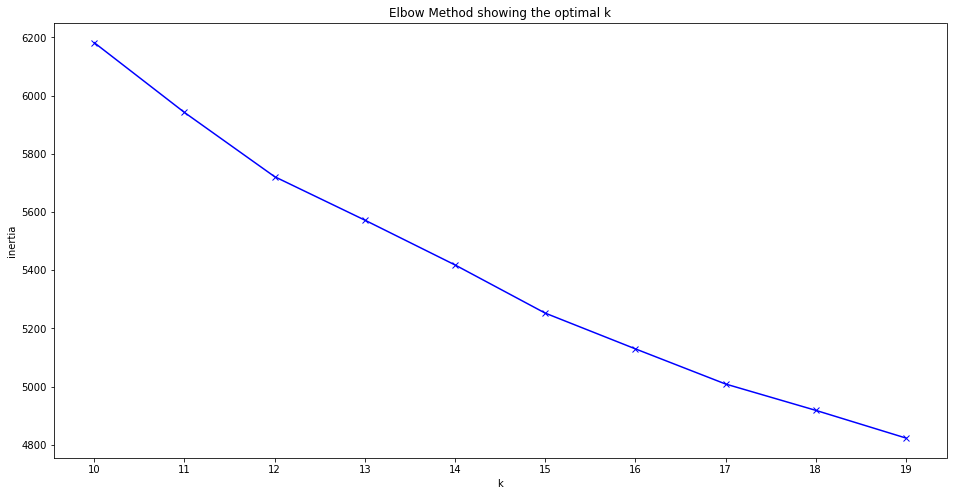

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [23]:
from sklearn.metrics import silhouette_score

# repeat the same process, now with the silhouette score
K = range(4, 20)

silhouette = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(data_scaled)
    silhouette.append(silhouette_score(data_scaled, kmeans.predict(data_scaled)))
    
silhouette


[0.1873283867747703,
 0.18770622789042607,
 0.183544102931318,
 0.18420583868361065,
 0.17601683457875342,
 0.17355244994349903,
 0.17532823075314077,
 0.1737362019167863,
 0.17113497656843937,
 0.1719261802571527,
 0.16195700364521606,
 0.16133382073369726,
 0.1610649943825901,
 0.16519512420480525,
 0.16409106156966213,
 0.162837256089756]

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

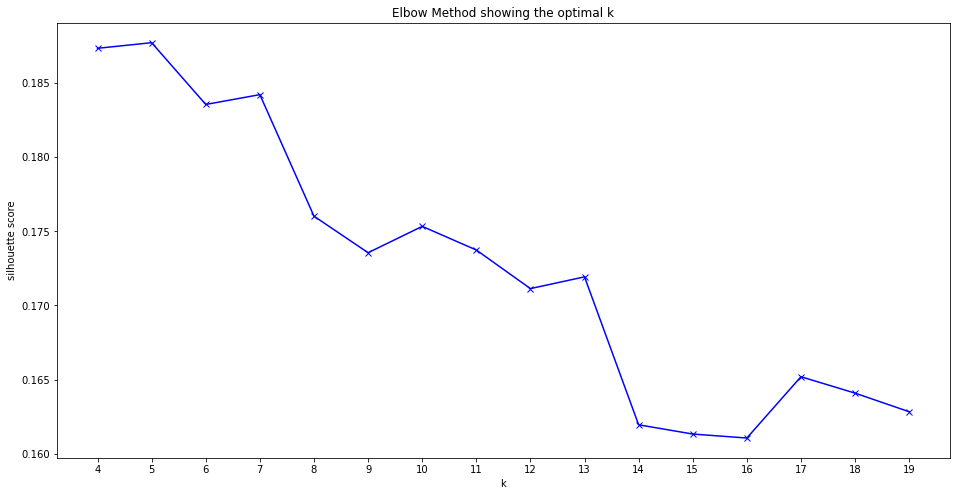

In [26]:
plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

## Attemp

In [49]:
def get_features_song_user():
    
    user_song = str(input("Posa una canço: ")).title()
    
    song = sp.search(user_song)
    
    user_song_uri = song["tracks"]["items"][0]["uri"]
    
    user_song_features = sp.audio_features(user_song_uri)[0]
    
    return pd.DataFrame({"danceability" : user_song_features["danceability"],
                        "energy" : user_song_features["energy"],
                        "loudness": user_song_features["loudness"],
                        "speechiness": user_song_features["speechiness"],
                        "acousticness": user_song_features["acousticness"],
                        "instrumentalness": user_song_features["instrumentalness"],
                        "valence": user_song_features["valence"]},index = [0])

In [50]:
df_new_song = get_features_song_user()

Posa una canço: Billie Jean


In [51]:
df_new_song

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,valence
0,0.92,0.654,-3.051,0.0401,0.0236,0.0158,0.847


In [52]:
import pickle

pickle.dump(scaler,open("scaler_1.pkl","wb"))
pickle.dump(kmeans, open("KMeans_1.pkl","wb"))

In [53]:
data_scaled = scaler.fit_transform(data_only_features)

data_scaled

array([[-0.11138345, -2.03981514, -2.19862111, ...,  2.30401531,
        -1.22818531,  1.73586857],
       [ 0.79289613, -1.78895584, -2.14981246, ...,  1.20714921,
        -1.71916225, -1.31079751],
       [ 0.44560035, -0.64158297, -0.86195398, ...,  1.9436616 ,
        -0.61702771, -1.24069282],
       ...,
       [-0.62249799,  0.99928362,  0.95298479, ...,  0.3600019 ,
        -1.50710287, -0.9663582 ],
       [-1.50711932, -0.7567315 , -0.63064346, ...,  1.79193373,
        -1.85574982,  2.68910105],
       [ 1.55956795,  0.15211941,  0.65164447, ...,  2.11119447,
         0.23203015,  0.16153787]])